<a href="https://colab.research.google.com/github/unmilan17/Assignment-10/blob/main/Movie_recommander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Flatten,  Concatenate
from tensorflow.keras.models import Model

from sklearn.utils import shuffle

In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2024-09-14 17:53:56--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  89.2MB/s    in 2.1s    

2024-09-14 17:53:58 (89.2 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [4]:
!ls

ml-20m	ml-20m.zip  sample_data


In [5]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [7]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [8]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [9]:
N = len(set(user_ids))
M = len(set(movie_ids))
K = 10

In [10]:
u = Input((1,))
m = Input((1,))

emb_u = Embedding(N,K)(u)
emb_m = Embedding(M,K)(m)

emb_u = Flatten()(emb_u)
emb_m = Flatten()(emb_m)

x = Concatenate()([emb_u,emb_m])

x = Dense(1024, activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = [u,m], outputs = x)

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.08, momentum = 0.9),
    loss = 'mse'
)

In [12]:
user_ids, movie_ids, ratings = shuffle(user_ids,movie_ids, ratings)
Ntrain = int(0.8*len(ratings))
train_userId = user_ids[:Ntrain]
train_movieId = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_userId = user_ids[-Ntrain:]
test_movieId = movie_ids[-Ntrain:]
test_ratings = ratings[-Ntrain:]

avg_rating = train_ratings.mean()
train_ratings  = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [13]:
r = model.fit(
    [train_userId,train_movieId],train_ratings,
    epochs = 25,
    batch_size = 1024,
    verbose = 2,
    validation_data = ([test_userId,train_movieId],test_ratings)
)

Epoch 1/25
15626/15626 - 131s - loss: 0.7666 - val_loss: 1.2195 - 131s/epoch - 8ms/step
Epoch 2/25
15626/15626 - 129s - loss: 0.6999 - val_loss: 1.2163 - 129s/epoch - 8ms/step
Epoch 3/25
15626/15626 - 128s - loss: 0.6775 - val_loss: 1.2766 - 128s/epoch - 8ms/step
Epoch 4/25
15626/15626 - 128s - loss: 0.6627 - val_loss: 1.2867 - 128s/epoch - 8ms/step
Epoch 5/25
15626/15626 - 128s - loss: 0.6505 - val_loss: 1.3295 - 128s/epoch - 8ms/step
Epoch 6/25
15626/15626 - 128s - loss: 0.6341 - val_loss: 1.3061 - 128s/epoch - 8ms/step
Epoch 7/25
15626/15626 - 128s - loss: 0.6172 - val_loss: 1.3151 - 128s/epoch - 8ms/step
Epoch 8/25
15626/15626 - 128s - loss: 0.6057 - val_loss: 1.3356 - 128s/epoch - 8ms/step
Epoch 9/25
15626/15626 - 129s - loss: 0.5967 - val_loss: 1.3596 - 129s/epoch - 8ms/step
Epoch 10/25
15626/15626 - 128s - loss: 0.5891 - val_loss: 1.3833 - 128s/epoch - 8ms/step
Epoch 11/25
15626/15626 - 128s - loss: 0.5823 - val_loss: 1.3633 - 128s/epoch - 8ms/step
Epoch 12/25
15626/15626 - 128s

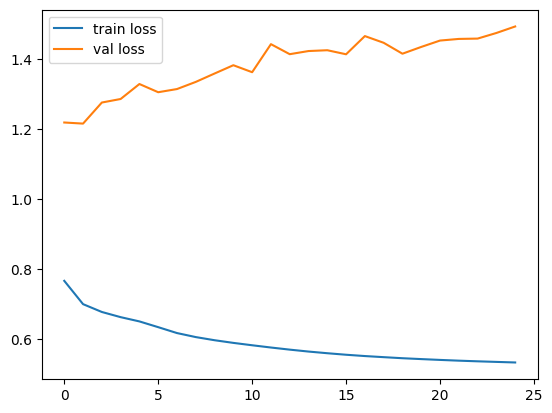

In [14]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()